In [1]:
using BSON
using BSON: @save, @load
using Flux
using Plots

In [2]:
include("src/NN_Extender.jl")

Main.NN_Extender

In [4]:
NN_Extender.main()

///////////////////////////////////////////////////////////////////////////////
                                Extender
///////////////////////////////////////////////////////////////////////////////
    
Neural Network would be changed from:
File: add9-best.bson
Activations: ["identity", "relu", "relu", "identity"]
Structure: [20, 30, 20, 20, 1]
Bias: true
Float64: true
To:
Saved to file: add9-plus-g3.bson
Activations: ["identity", "relu", "relu", "identity"]
Structure: [21, 35, 25, 25, 1]
Bias: true
Float64: true
❌ Failed test!
Input model result: -24.868338972873826
Output model result: -24.873570915054838
Difference: 0.005231942181012528
❌ Failed test!
Input model result: -24.68014670864344
Output model result: -24.668692907439073
Difference: 0.01145380120436812
❌ Failed test!
Input model result: 19.209888548830964
Output model result: 19.323246829966852
Difference: 0.11335828113588775
❌ Failed test!
Input model result: -1.2516702387311254
Output model result: -1.2492366710671972


In [5]:
model_file_name_1 = "add9-best.bson"
model_file_name_2 = "add9-plus-g3.bson";

In [6]:
model = nothing
BSON.@load model_file_name_1 model

In [7]:
model

Chain(
  Dense(20 => 30),                      # 630 parameters
  Dense(30 => 20, relu),                # 620 parameters
  Dense(20 => 20, relu),                # 420 parameters
  Dense(20 => 1),                       # 21 parameters
)                   # Total: 8 arrays, 1_691 parameters, 13.711 KiB.

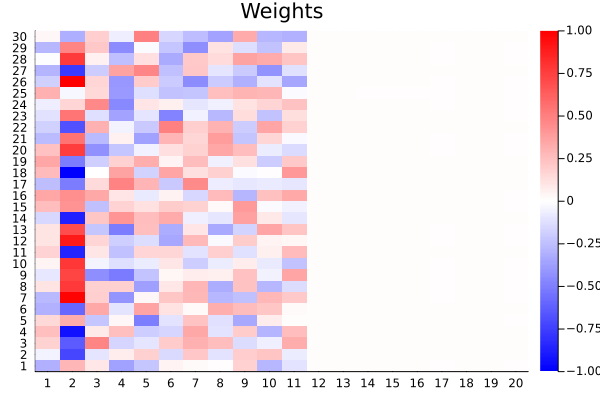

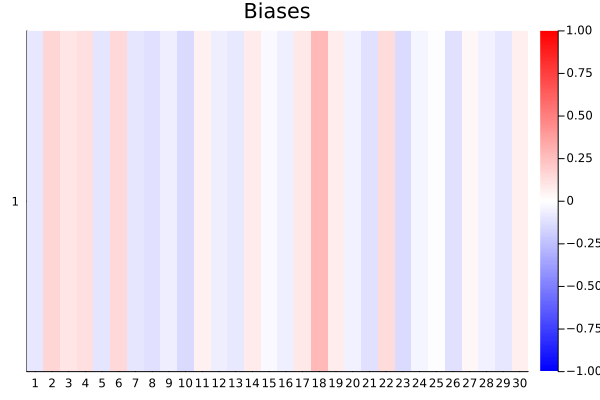

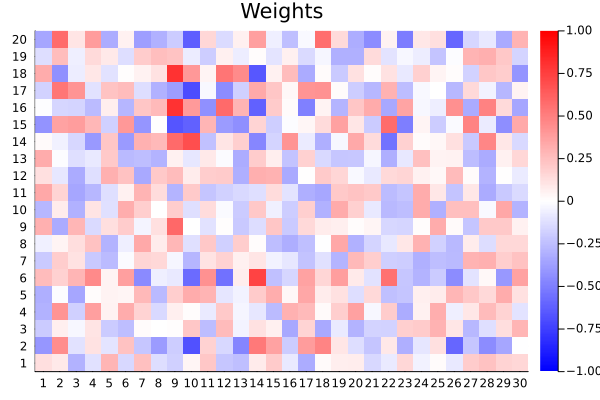

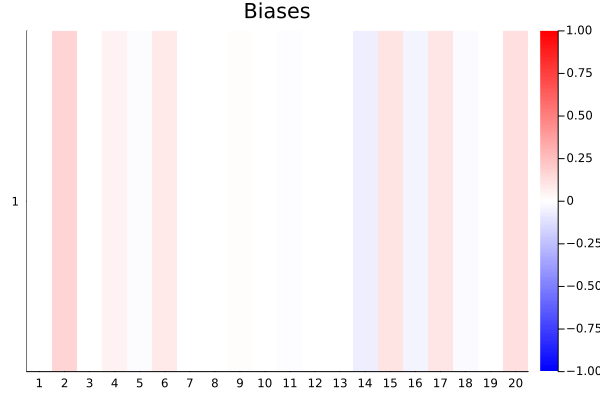

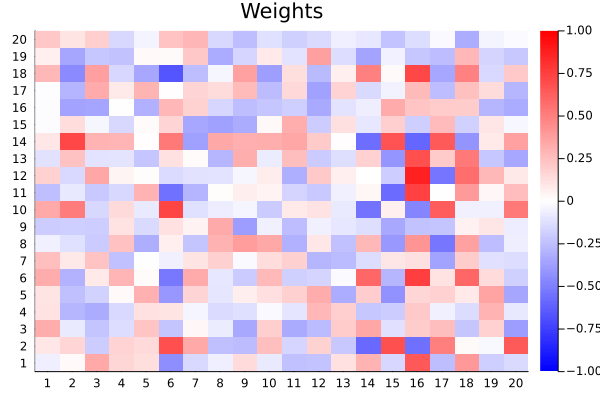

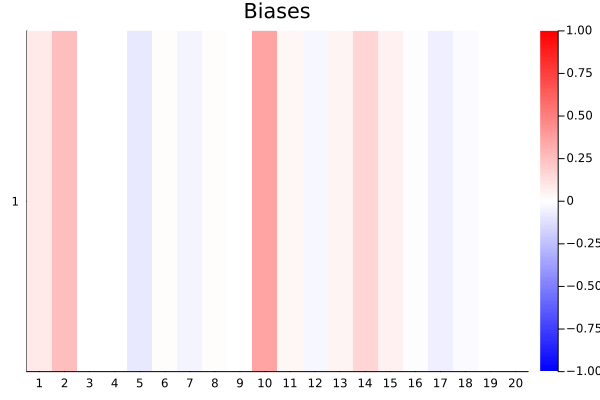

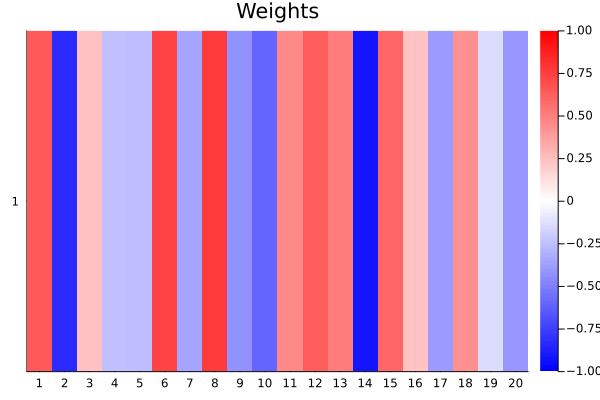

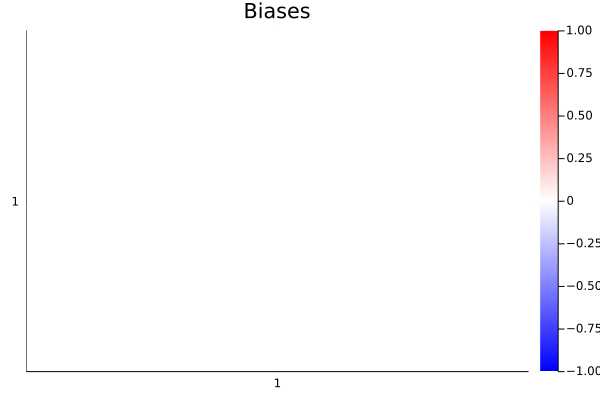

In [8]:
NN_Extender.plot_model_parameters(model)

In [9]:
model = nothing
BSON.@load model_file_name_2 model


In [10]:
model

Chain(
  Dense(21 => 35),                      # 770 parameters
  Dense(35 => 25, relu),                # 900 parameters
  Dense(25 => 25, relu),                # 650 parameters
  Dense(25 => 1),                       # 26 parameters
)                   # Total: 8 arrays, 2_346 parameters, 18.828 KiB.

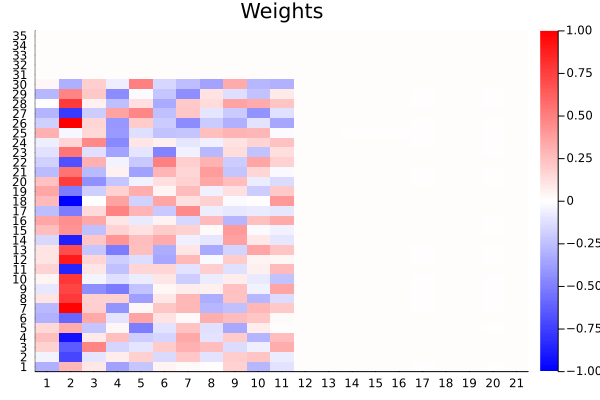

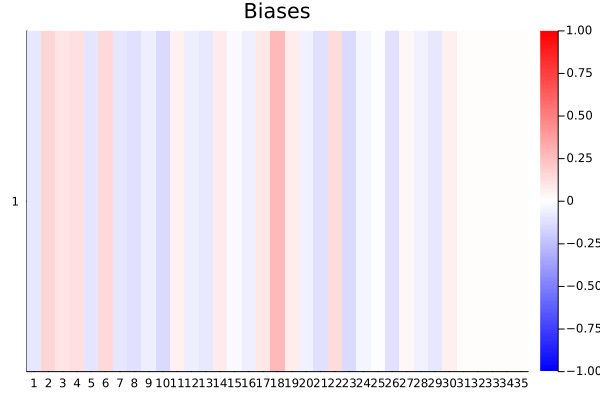

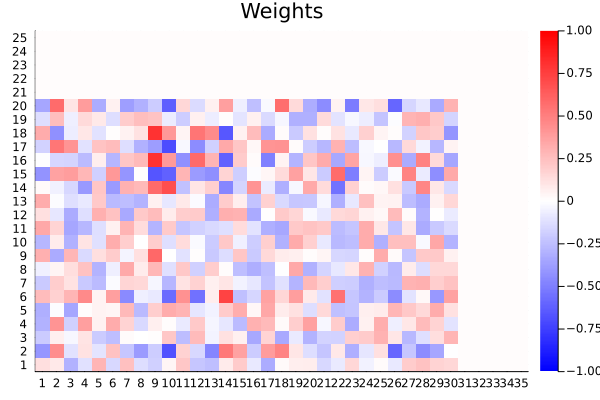

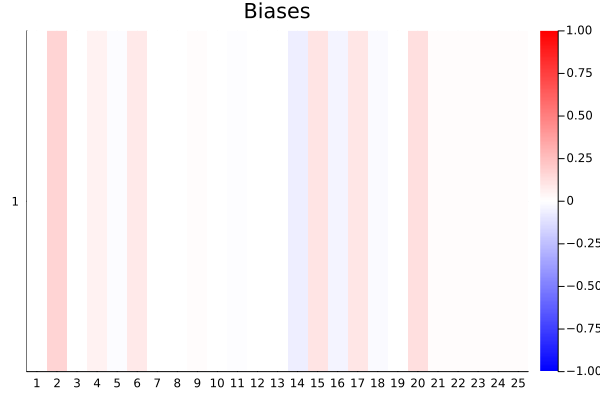

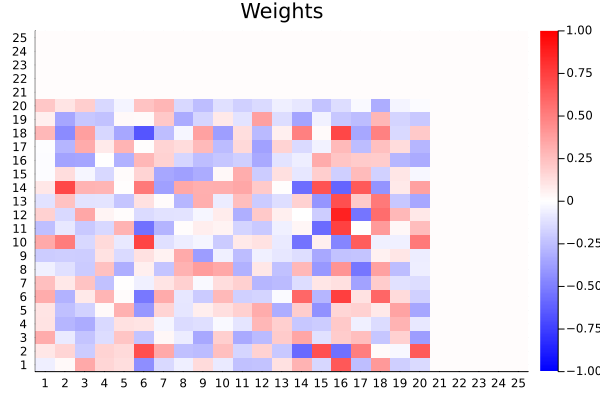

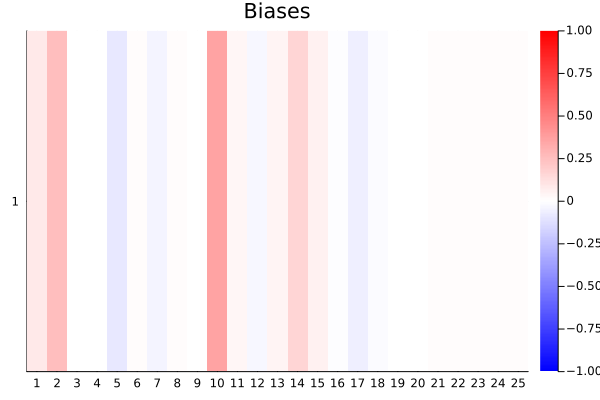

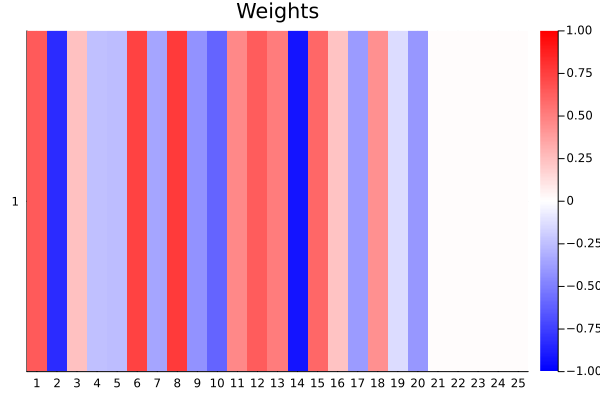

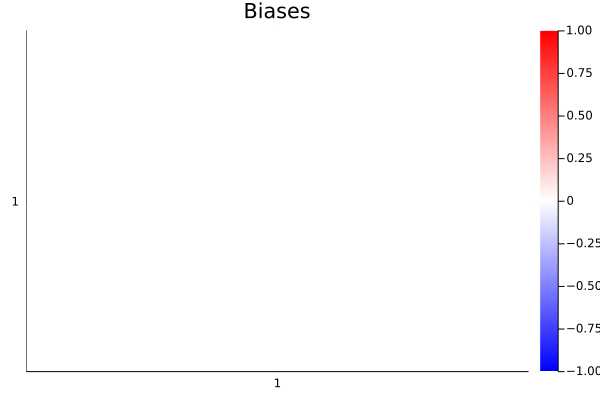

In [11]:
NN_Extender.plot_model_parameters(model)

# Testing

In [12]:
model = nothing
output_model = nothing

BSON.@load model_file_name_2 model
output_model = model
model = nothing
BSON.@load model_file_name_1 model



mul = 1
n1 = size(model.layers[1].weight)[2]
n2 = size(output_model.layers[1].weight)[2]


for i in 1:1000
    input_vector1 = rand(n1) .* mul
    v_2 = rand(n2 - n1) .* mul
    input_vector2 = vcat(input_vector1, v_2)
    result1 = model(input_vector1)
    result2 = output_model(input_vector2)
    if abs(result1[1] - result2[1]) > 0.00000001
        println("❌ Failed test!")
        println("Input model result: $(result1[1])")
        println("Output model result: $(result2[1])")
        println("Difference: $(abs(result1[1] - result2[1]))")
    end
    mul *= -1
end


❌ Failed test!
Input model result: 5.35651151244822
Output model result: 5.488305617392059
Difference: 0.1317941049438387
❌ Failed test!
Input model result: 1.4818322665107773
Output model result: 1.4472102524647623
Difference: 0.03462201404601495
❌ Failed test!
Input model result: -13.482737817784283
Output model result: -13.492901294849254
Difference: 0.010163477064971005
❌ Failed test!
Input model result: -15.36685367915628
Output model result: -15.33318086818117
Difference: 0.03367281097511032
❌ Failed test!
Input model result: -9.718415920779853
Output model result: -9.709839686981917
Difference: 0.008576233797935373
❌ Failed test!
Input model result: -8.704203899191008
Output model result: -8.66832396799699
Difference: 0.035879931194017445
❌ Failed test!
Input model result: 5.807824012007013
Output model result: 5.9472419687358595
Difference: 0.13941795672884627
❌ Failed test!
Input model result: -21.43532195610352
Output model result: -21.41489211104126
Difference: 0.02042984506

In [13]:
# One test
input_vector1 = rand(n1) .* mul
v_2 = rand(n2 - n1) .* mul
input_vector2 = vcat(input_vector1, v_2)
result1 = model(input_vector1)
result2 = output_model(input_vector2)
println("Input model result: $(result1[1])")
println("Output model result: $(result2[1])")

Input model result: 2.9223868698274584
Output model result: 2.91355480997966


In [14]:
model

Chain(
  Dense(20 => 30),                      # 630 parameters
  Dense(30 => 20, relu),                # 620 parameters
  Dense(20 => 20, relu),                # 420 parameters
  Dense(20 => 1),                       # 21 parameters
)                   # Total: 8 arrays, 1_691 parameters, 13.711 KiB.

In [15]:
output_model

Chain(
  Dense(21 => 35),                      # 770 parameters
  Dense(35 => 25, relu),                # 900 parameters
  Dense(25 => 25, relu),                # 650 parameters
  Dense(25 => 1),                       # 26 parameters
)                   # Total: 8 arrays, 2_346 parameters, 18.828 KiB.

In [16]:
Flux.params(output_model)[1][:, end]

35-element Vector{Float64}:
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 ⋮
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01
 0.01

In [17]:
sum(Flux.params(output_model)[1][:, end])

0.35

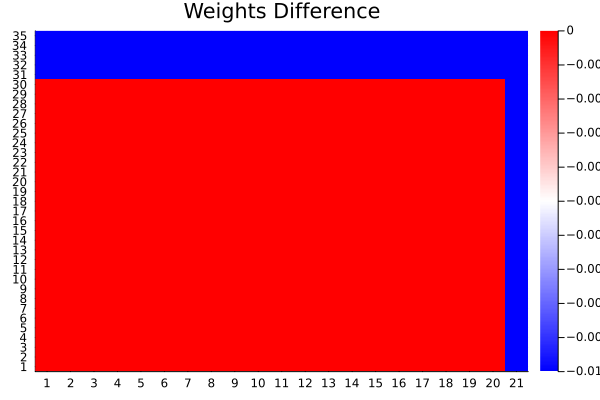

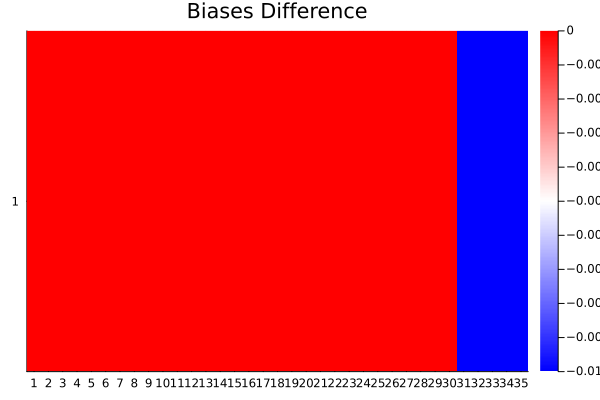

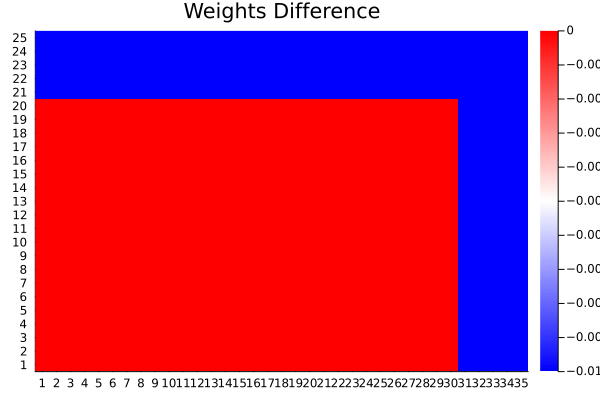

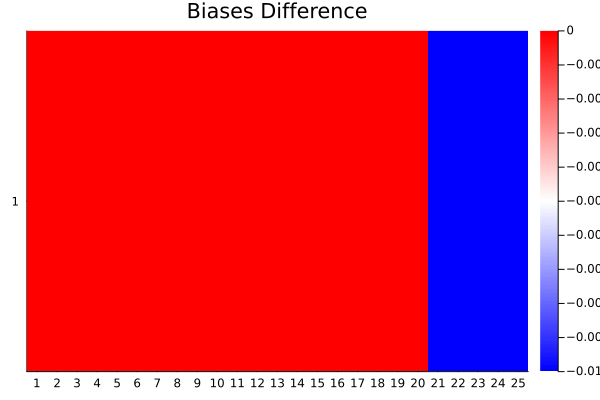

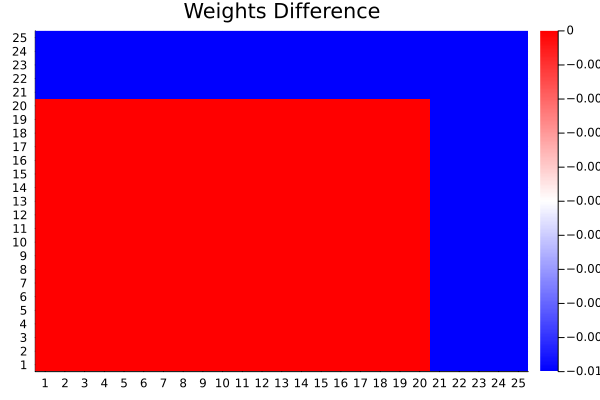

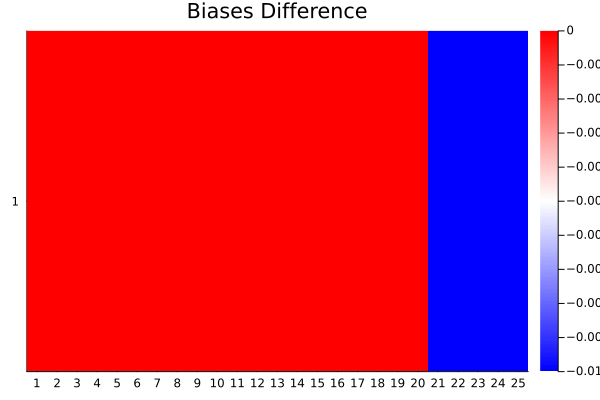

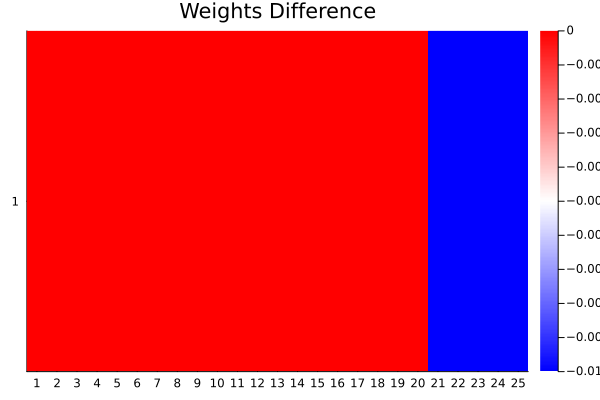

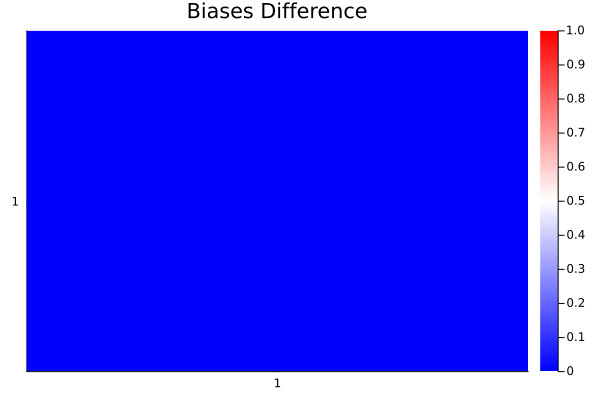

In [18]:
NN_Extender.plot_model_weight_differences(model, output_model)